# Metody Inteligencji Obliczeniowej w Analizie Danych

[Tasks](https://pages.mini.pw.edu.pl/~karwowskij/mioad/lab-sieci.html)

### Lab 2/3:  Implementacja propagacji wstecznej błędu (2 tygodnie, 4 punkty)

W ramach tego laboratorium trzeba zaimplementować uczenie sieci neuronowej propagacją wsteczną błędu.


Aby sprawdzić implementację, należy wykonać uczenie na prostych danych do uczenia dostarczonych na
zajęciach. Następnie należy zaimplementować metodę wizualizacji wartości wag sieci w kolejnych iteracjach
i, w przypadku gdy nie udaje się nauczyć sieci, spróbować wykorzystać te wizualizacje do ustalenia
przyczyny problemu. Zaimplementować wersję z aktualizacją wag po prezentacji wszystkich wzorców i
wersję z aktualizacją po prezentacji kolejnych porcji (batch). Porównać szybkość uczenia dla każdego z
wariantów.

Inicjować wagi z rozkładu jednostajnego na przedziale [0,1]. Opcjonalnie zaimplementować inną metodą
inicjowania wag. Albo metodę He albo Xavier.

Przetestować uczenie sieci na następujących zbiorach (w nawiasach wartość MSE, aby otrzymać 4 punkty):
- square-simple (jeśli sieć nie jest w stanie się nauczyć tej funkcji to coś jest bardzo źle zrobione, MSE:
4),
- steps-small (MSE: 4),
- multimodal-large (MSE: 40).
(Wartości MSE liczone na nieznormalizowanych danych)

#### TODO:

- ~~change the weights initialization to uniform(0,1), Xavier or He~~
- implemnent cost function for MSE
- ~~implement gradients for activation functions~~
- ~~implement backpropagation without bias~~
- ~~implement backpropagation with bias~~
- ~~implement batch learning~~
- ~~implement visualization~~
- ~~compare learning speed with and without batch learning~~


In [1]:
from MultiLayerPerceptron import NeuralNetwork, Layer
import pandas as pd

### Function for visualization of weights during training

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import imageio
from tqdm import tqdm

def plot_weights_bars(net,filename="weights_bars.gif",fps=10,plot_every_n_epochs=1):
    weights_history_all = net.get_training_history()['weights_history']
    epochs_count = len(weights_history_all)
    layers_count = len(weights_history_all[0])

    y_min = [[] for layer in range(layers_count)]
    y_max = [[] for layer in range(layers_count)]
    for epoch in range(epochs_count):
        for layer in range(layers_count):
            y_min[layer].append(weights_history_all[epoch][layer].min())
            y_max[layer].append(weights_history_all[epoch][layer].max())

    y_min = [1.1 * np.array(y_min[layer]).min() for layer in range(layers_count)]
    y_max = [1.1 * np.array(y_max[layer]).max() for layer in range(layers_count)]

    fig, axs = plt.subplots(layers_count,figsize=(12,4*layers_count),dpi=200)
    plt.subplots_adjust(wspace=0.0, hspace=0.5)
    fig.suptitle('Weights during training, saved as ' + filename)
    images = []
    for epoch in tqdm(range(0,epochs_count+plot_every_n_epochs,plot_every_n_epochs)):
        epoch = min(epoch,epochs_count-1)
        data_for_epoch = weights_history_all[epoch]
        for layer in range(layers_count):
            weights = data_for_epoch[layer].reshape(-1)
            plt.cla()
            axs[layer].clear()
            axs[layer].set(xlabel='Weigths', ylabel='Value',title='Weights of layer '+str(layer+1)+' in epoch '+str(epoch+1))
            axs[layer].set_ylim(y_min[layer], y_max[layer])
            axs[layer].bar(np.arange(weights.shape[0]), weights)
        fig.canvas.draw()       
        image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
        image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
        images.append(image)
    images += [images[-1]] * fps 
    imageio.mimsave(filename,images, fps=fps)

### Function for visualization of predicted vs original data

In [3]:
import matplotlib.pyplot as plt
def plot_compare_predicted_real(net, x_train,y_train,x_test,y_test):
    plt.scatter(x_train, y_train, color="green",label="real y")
    plt.scatter(x_train, net.predict(x_train), color="red",label="predicted y")
    plt.legend()
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("real vs predicted y - train data")
    plt.show()

    plt.scatter(x_test, y_test, color="green",label="real y")
    plt.scatter(x_test, net.predict(x_test), color="red",label="predicted y")
    plt.legend()
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("real vs predicted y - test data")
    plt.show()

## Dataset 1: Square Simple

In [4]:
df_train = pd.read_csv('data/regression/square-simple-training.csv').set_index("Unnamed: 0")
df_test = pd.read_csv('data/regression/square-simple-test.csv').set_index("Unnamed: 0")
print(df_test.head())

x_train = [[x] for x in df_train.loc[:,"x"]]
y_train = [[y] for y in df_train.loc[:,"y"]]
x_test = [[x] for x in df_test.loc[:,"x"]]
y_test = [[y] for y in df_test.loc[:,"y"]]

                   x           y
Unnamed: 0                      
1          -0.980437  -43.486918
2          -1.219074    3.752808
3           0.124243 -128.610721
4           1.227789    5.671828
5           1.067348  -27.469169


#### Model 1

In [5]:
net1 = NeuralNetwork(weights_randomizer='uniform')
net1.add(Layer(neurons_count=1, add_bias=True))
net1.add(Layer(neurons_count=100, activation_fun="sigmoid", add_bias=True))
net1.add(Layer(neurons_count=1, activation_fun="linear", add_bias=False))

Epoch:    1/200,   MSE train:12831.654,   MSE test:11737.874
Epoch:   21/200,   MSE train:   19.686,   MSE test:   17.875
Epoch:   41/200,   MSE train:   13.412,   MSE test:   12.244
Epoch:   61/200,   MSE train:   12.071,   MSE test:   10.538
Epoch:   81/200,   MSE train:     9.93,   MSE test:    8.603
Epoch:  101/200,   MSE train:    7.859,   MSE test:    6.831
Epoch:  121/200,   MSE train:     6.13,   MSE test:    5.372
Epoch:  141/200,   MSE train:    4.721,   MSE test:    4.202
Epoch:  161/200,   MSE train:     3.58,   MSE test:    3.273
Epoch:  181/200,   MSE train:    2.673,   MSE test:    2.549
Epoch:  200/200,   MSE train:    2.005,   MSE test:    2.026


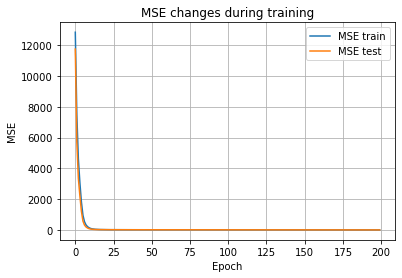

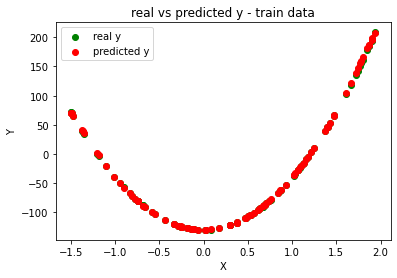

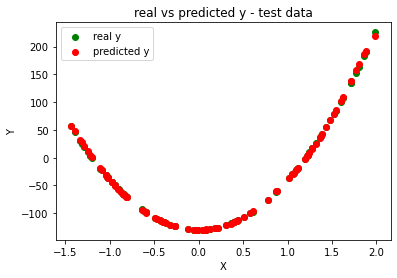

In [6]:
net1.train(x_train, y_train,x_test,y_test, epochs=200, learning_rate=0.003, batch_size=1)
net1.plot_training_history()

plot_compare_predicted_real(net1, x_train,y_train,x_test,y_test)

## Dataset 2: Steps Small

In [7]:
df_train = pd.read_csv('data/regression/steps-small-training.csv').set_index("Unnamed: 0")
df_test = pd.read_csv('data/regression/steps-small-test.csv').set_index("Unnamed: 0")
print(df_train.head())

x_train = [[x] for x in df_train.loc[:,"x"]]
y_train = [[y] for y in df_train.loc[:,"y"]]
x_test = [[x] for x in df_test.loc[:,"x"]]
y_test = [[y] for y in df_test.loc[:,"y"]]

                   x    y
Unnamed: 0               
1           1.786896  160
2           1.189037   80
3          -0.917923  -80
4          -0.518967  -80
5          -0.011570    0


#### Model 1

In [8]:
net2 = NeuralNetwork()
net2.add(Layer(neurons_count=1, add_bias=True))
net2.add(Layer(neurons_count=10, activation_fun='sigmoid', add_bias=True))
net2.add(Layer(neurons_count=10, activation_fun='sigmoid', add_bias=True))
net2.add(Layer(neurons_count=1, activation_fun='linear', add_bias=False))

Epoch:    1/1000,   MSE train: 6464.574,   MSE test: 7752.104
Epoch:  101/1000,   MSE train:  598.901,   MSE test:  721.118
Epoch:  201/1000,   MSE train:   46.433,   MSE test:  130.643
Epoch:  301/1000,   MSE train:    8.637,   MSE test:   97.588
Epoch:  401/1000,   MSE train:    4.029,   MSE test:   95.517
Epoch:  501/1000,   MSE train:    2.639,   MSE test:   96.222
Epoch:  601/1000,   MSE train:    1.927,   MSE test:   97.043
Epoch:  701/1000,   MSE train:    1.501,   MSE test:   97.425
Epoch:  801/1000,   MSE train:    1.231,   MSE test:   97.506
Epoch:  901/1000,   MSE train:    1.046,   MSE test:   97.513
Epoch: 1000/1000,   MSE train:    0.913,   MSE test:   97.558


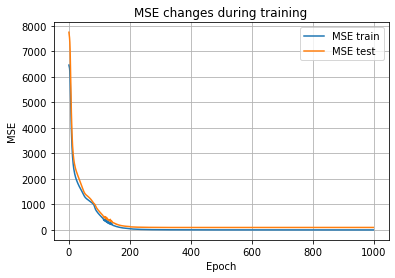

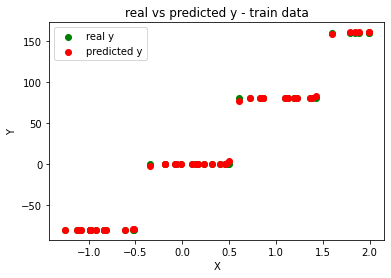

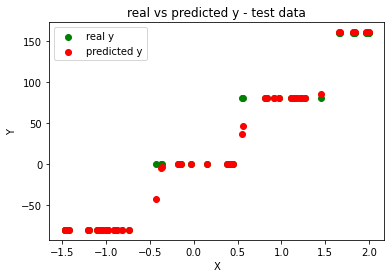

In [9]:
net2.train(x_train, y_train,x_test,y_test, epochs=1000, learning_rate=0.001, batch_size=1)
net2.plot_training_history()

plot_compare_predicted_real(net2, x_train,y_train,x_test,y_test)

## Multimodal Large

In [10]:
df_train = pd.read_csv('data/regression/multimodal-large-test.csv')
df_test = pd.read_csv('data/regression/multimodal-large-training.csv')
print(df_train.head())

x_train = [[x] for x in df_train.loc[:,"x"]]
y_train = [[y] for y in df_train.loc[:,"y"]]
x_test = [[x] for x in df_test.loc[:,"x"]]
y_test = [[y] for y in df_test.loc[:,"y"]]

          x           y
0  0.493292  -98.208166
1 -0.470203  -55.283891
2  1.869983  100.299997
3 -1.040446    2.720629
4 -0.616507  -75.991636


### Model 1

In [11]:
net3 = NeuralNetwork()
net3.add(Layer(neurons_count=1, add_bias=True))
net3.add(Layer(neurons_count=100, activation_fun='sigmoid', add_bias=True))
net3.add(Layer(neurons_count=1, activation_fun='linear', add_bias=False))

Epoch:    1/100,   MSE train: 5366.917,   MSE test:  5337.72
Epoch:   11/100,   MSE train:  869.421,   MSE test:  806.241
Epoch:   21/100,   MSE train:  239.278,   MSE test:  238.931
Epoch:   31/100,   MSE train:  174.243,   MSE test:  174.436
Epoch:   41/100,   MSE train:  122.453,   MSE test:  123.035
Epoch:   51/100,   MSE train:   71.418,   MSE test:   74.069
Epoch:   61/100,   MSE train:   42.314,   MSE test:   46.246
Epoch:   71/100,   MSE train:   26.753,   MSE test:    31.19
Epoch:   81/100,   MSE train:   17.837,   MSE test:   22.509
Epoch:   91/100,   MSE train:   12.297,   MSE test:   17.008
Epoch:  100/100,   MSE train:    9.415,   MSE test:   14.165


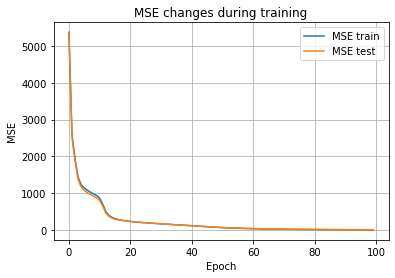

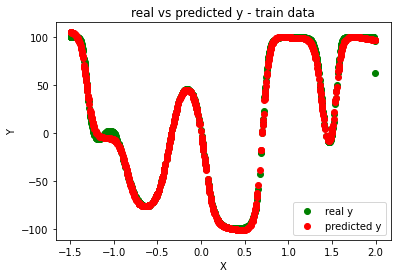

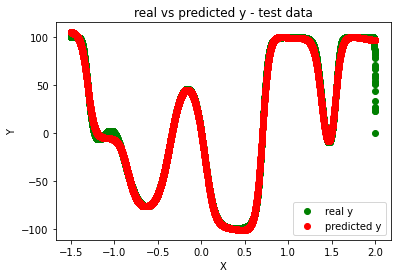

In [12]:
net3.train(x_train, y_train,x_test,y_test, epochs=100, learning_rate=0.003, batch_size=1)
net3.plot_training_history()

plot_compare_predicted_real(net3, x_train,y_train,x_test,y_test)

#### Results

MSE for the `square simple` dataset is:  
- train: 2.005
- test: 2.026

MSE for the `steps small` dataset is:  
- train: 0.913
- test: 97.558 (overfitting)

MSE for the `multimodal large` dataset is:
- train: 9.415
- test: 14.165

#### Learning speed vs batch size

In general, I have observed that fewer iterations are necessary to learn the model if lower batch size is used. However, error was sometimes slightly increasing when batch size was equal to 1. On the other hand, when batch size was equal to all sample, error was steadily decreasing.

# Weights values during training

As in the task, weights of all networks are visualized during training. The weights for each network are visualized as a gif, where each frame represents weights after one or more iterations. Final values of weigths are represented by the last frame visible below.

#### Square Simple

100%|██████████| 21/21 [00:10<00:00,  2.02it/s]


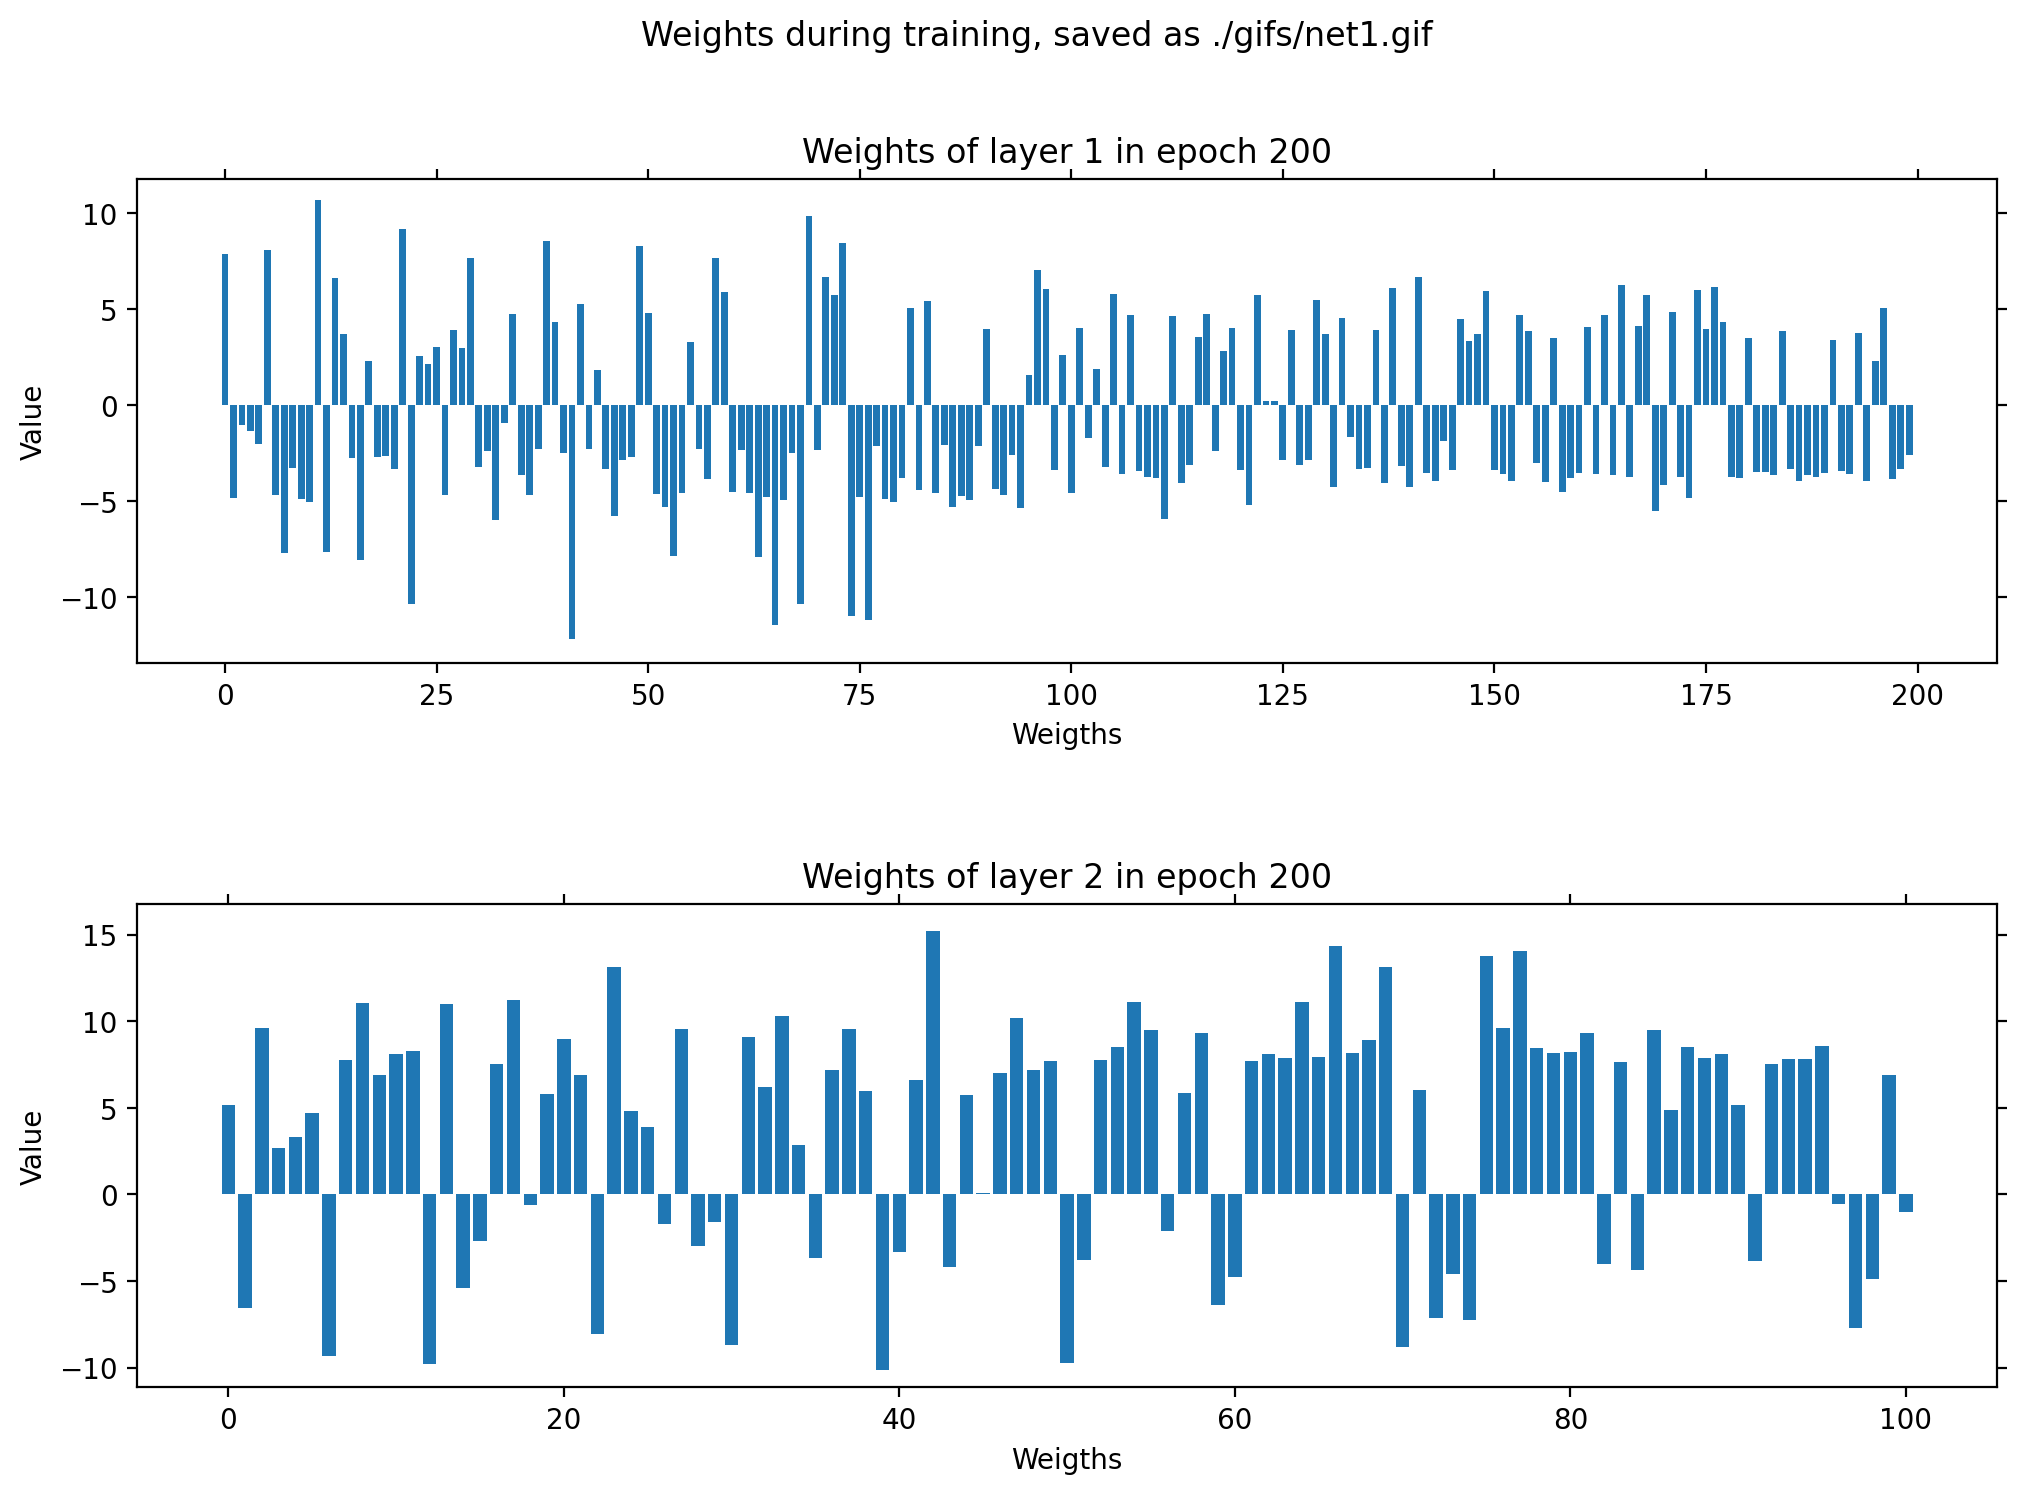

In [13]:
plot_weights_bars(net1, filename = './gifs/net1.gif',fps=10, plot_every_n_epochs=10)

#### Steps Small

100%|██████████| 101/101 [00:48<00:00,  2.09it/s]


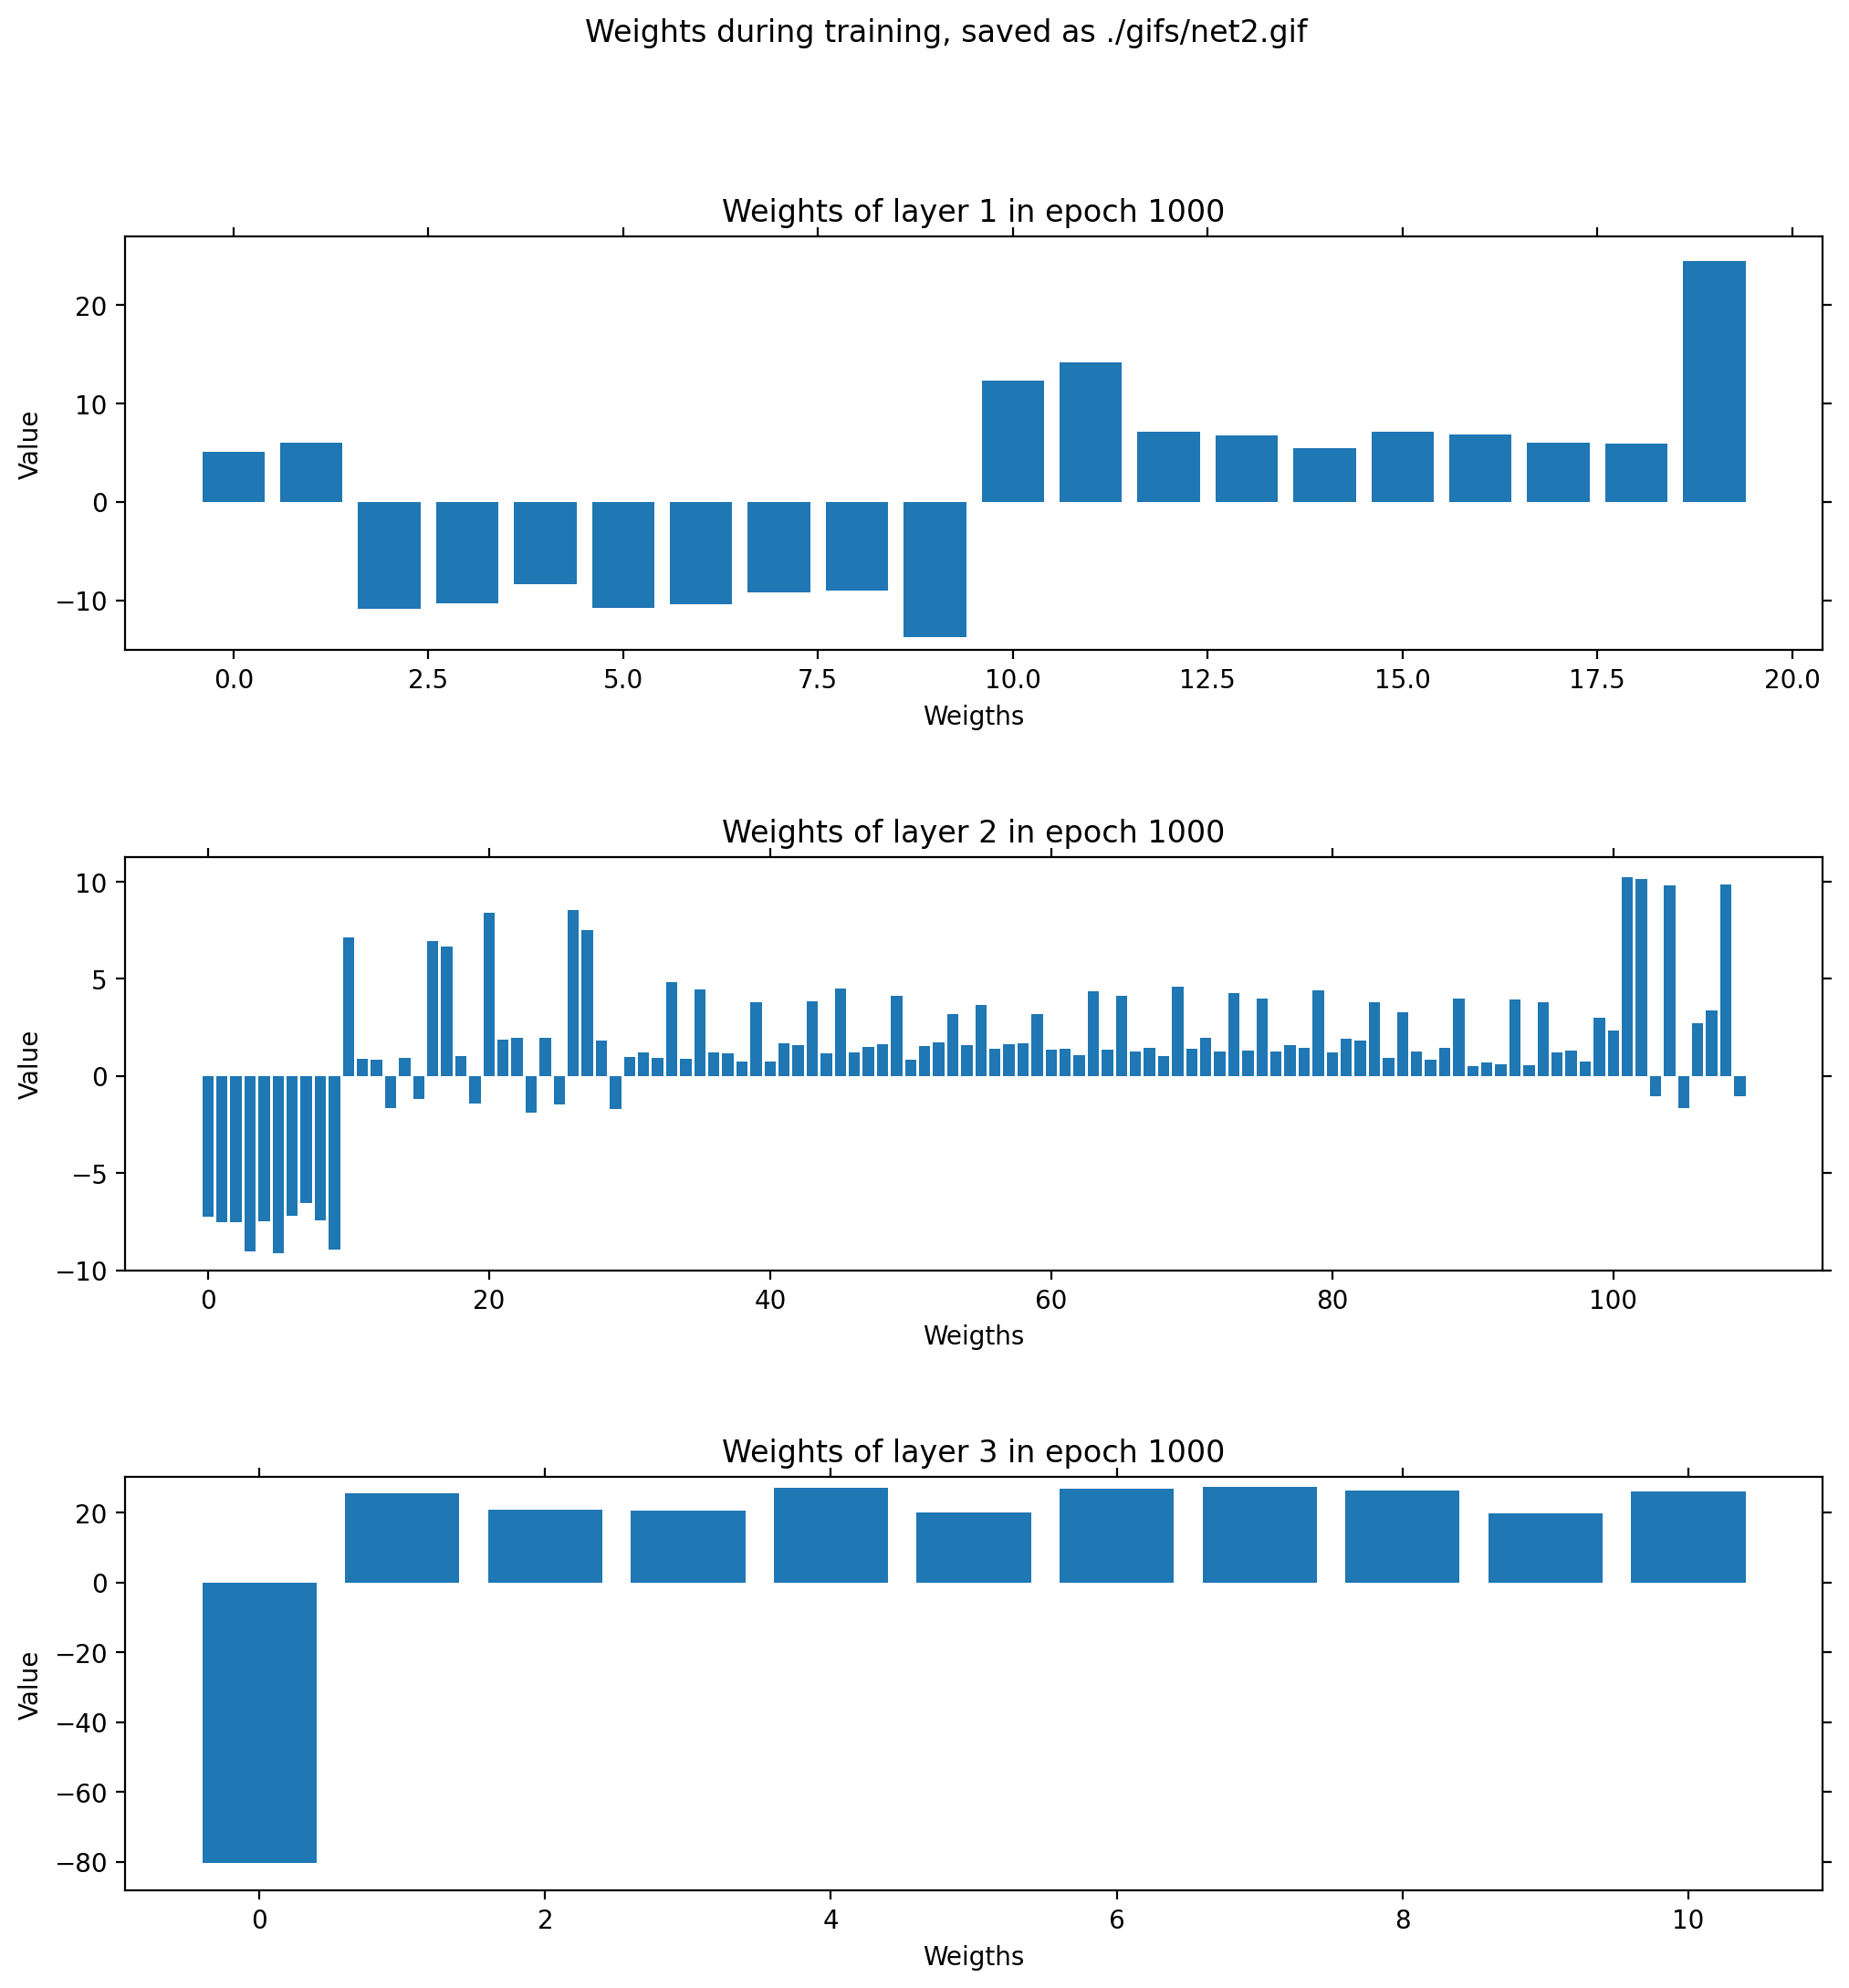

In [14]:
plot_weights_bars(net2, filename = './gifs/net2.gif',fps=10, plot_every_n_epochs=10)

#### Multimodal Large

100%|██████████| 35/35 [00:16<00:00,  2.09it/s]


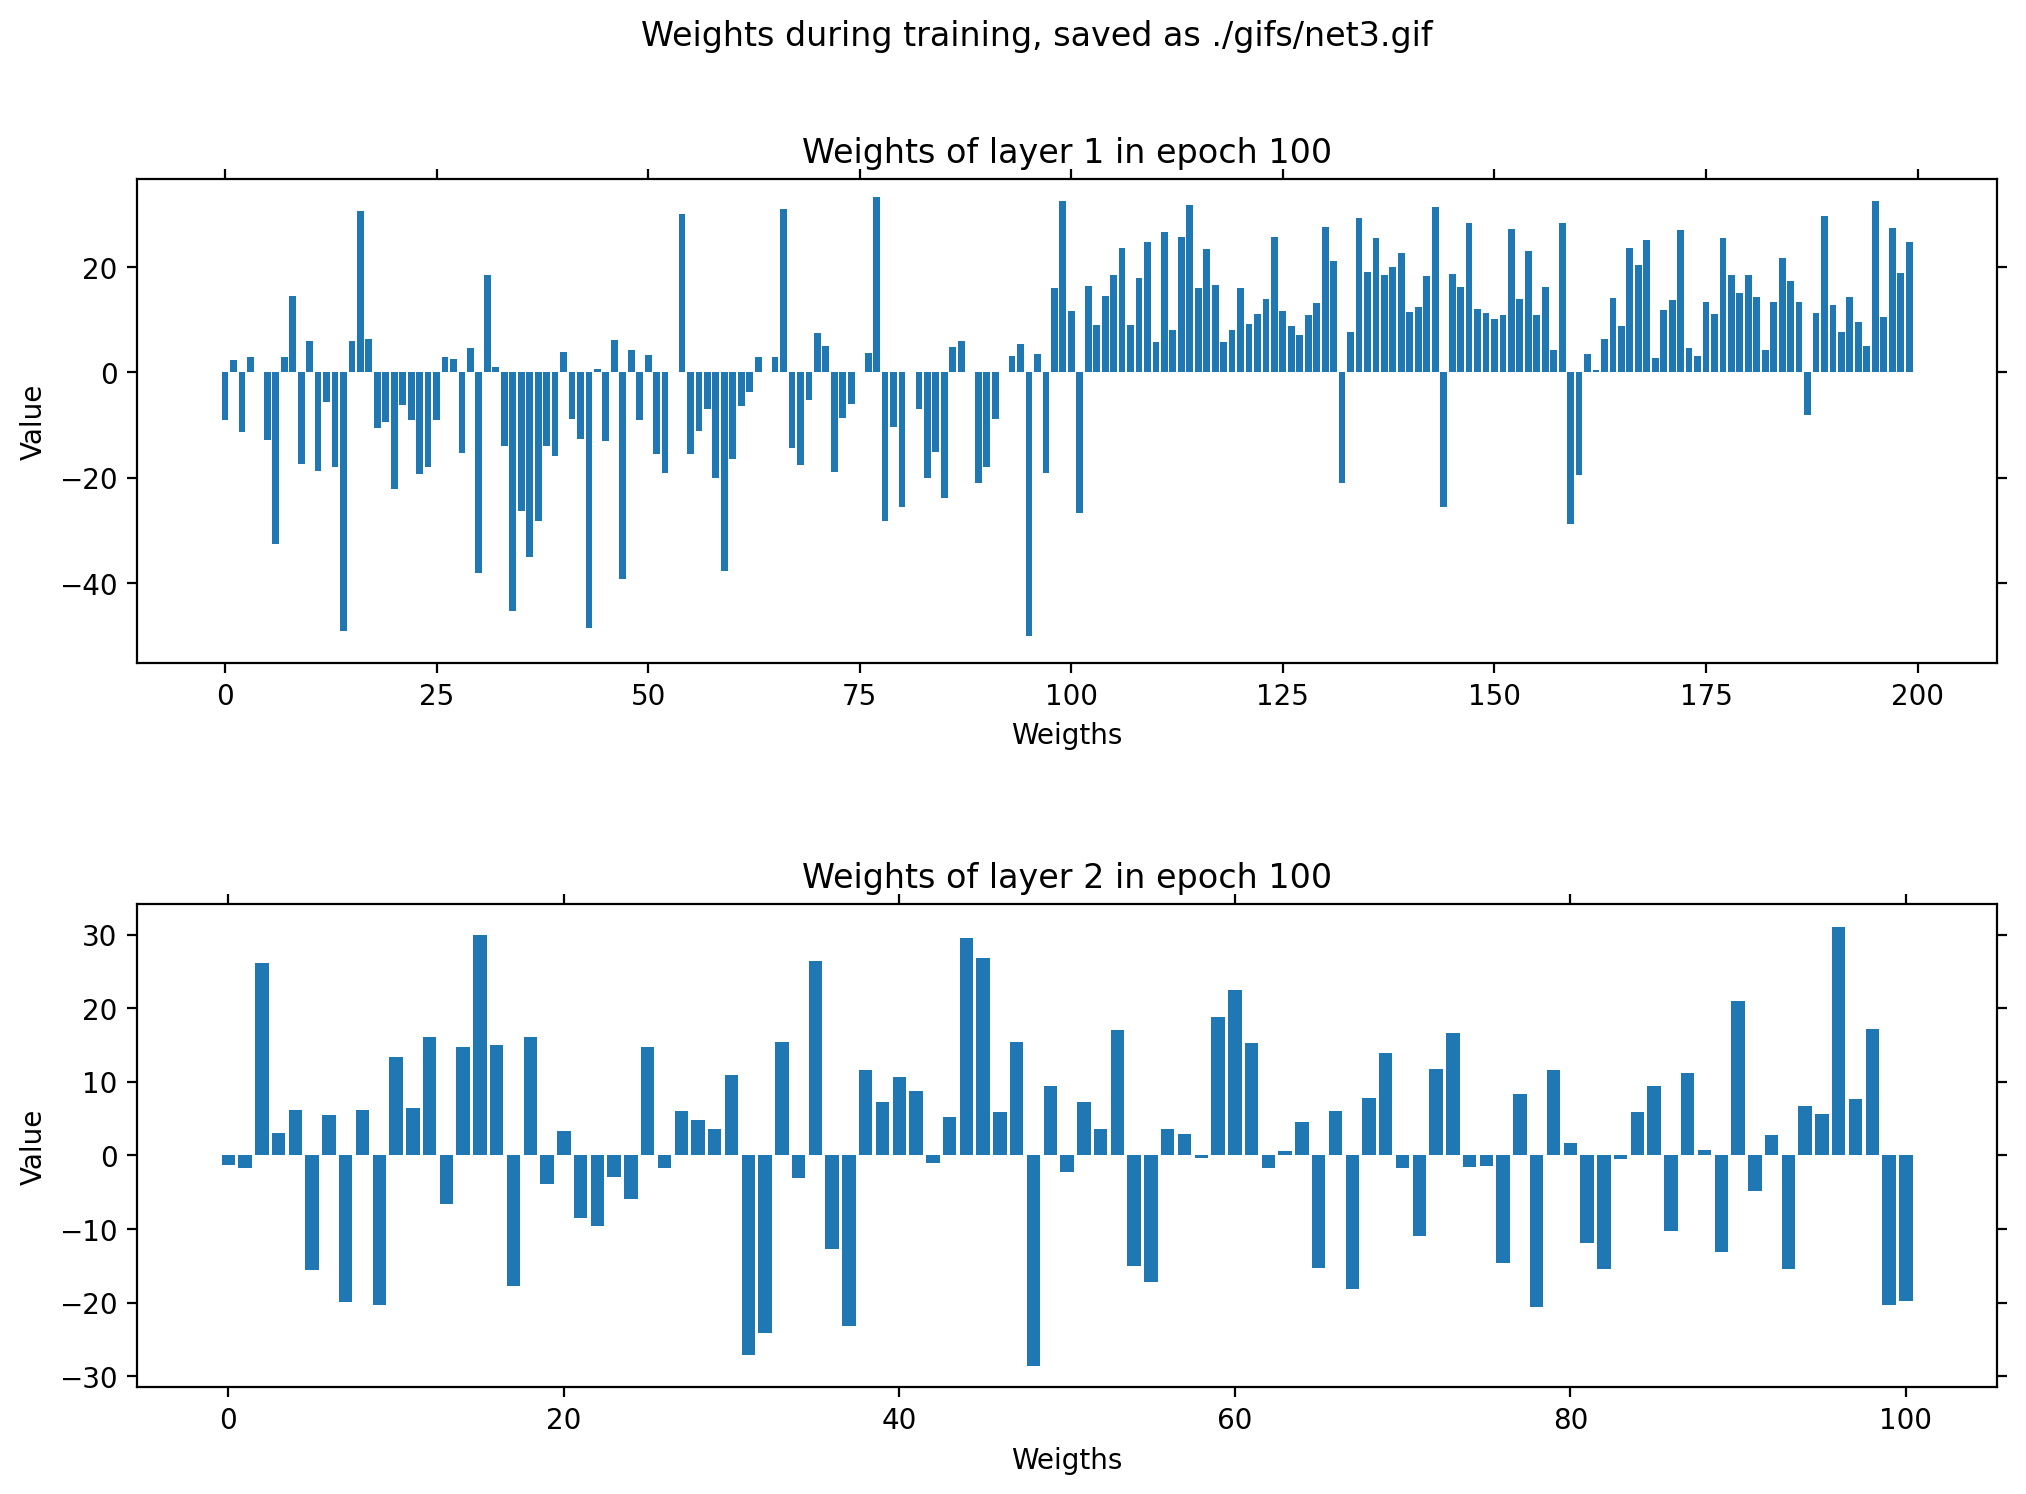

In [15]:
plot_weights_bars(net3, filename = './gifs/net3.gif',fps=10, plot_every_n_epochs=3)